# Set up enviroment

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Start

In [3]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [4]:
# dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/Eximbank.csv'
df = pd.read_csv('Eximbank.csv', index_col="Date")


In [5]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-01 00:00:00+07:00,12323.44629,12429.37891,12005.64941,12217.51367,101102
2019-03-04 00:00:00+07:00,12217.51367,12711.86426,12146.89258,12570.62109,1698208
2019-03-05 00:00:00+07:00,12570.62109,12570.62109,12252.82520,12252.82520,1940443
2019-03-06 00:00:00+07:00,12535.31055,12535.31055,12252.82520,12288.13574,40228
2019-03-07 00:00:00+07:00,12076.27148,12288.13574,12005.64941,12076.27148,4753044
2019-03-08 00:00:00+07:00,12005.64941,12429.37891,12005.64941,12252.82520,234447
2019-03-11 00:00:00+07:00,12076.27148,12394.06738,12076.27148,12252.82520,36136
2019-03-12 00:00:00+07:00,12252.82520,12500.00000,12252.82520,12500.00000,808790
2019-03-13 00:00:00+07:00,12570.62109,12641.24316,12464.68945,12570.62109,1816997


In [6]:
print(f"Data shape: {df.shape}")

Data shape: (1306, 5)


## Data preprocessing

### Checking duplicates and null values

In [7]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [8]:
print("Null")
df.isnull().sum()

Null


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Checking DataFrame information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 2019-03-01 00:00:00+07:00 to 2024-05-31 00:00:00+07:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1306 non-null   float64
 1   High    1306 non-null   float64
 2   Low     1306 non-null   float64
 3   Close   1306 non-null   float64
 4   Volume  1306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.2+ KB


### Overview Data Descriptive statistic

In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,1306.000000,1306.000000,1306.000000,1306.000000,1.306000e+03
mean,16650.377875,16922.427347,16382.154743,16673.737042,8.727535e+06
std,4287.076034,4367.722864,4171.046417,4257.231701,1.482414e+07
min,9887.005859,10593.220700,9887.005859,10346.044920,3.426000e+03
25%,12358.756840,12535.310550,12182.203130,12394.067380,7.778795e+05
50%,16995.762695,17245.763670,16605.084960,16949.152340,3.796930e+06
75%,19415.678225,19729.873535,19024.364747,19385.593750,1.121118e+07
max,29661.017580,29943.501950,27824.859380,29661.017580,1.941662e+08


## Linear Regression Model

### Split Data

In [11]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [12]:
def makePlots(data):
    (test_ratio, x_train, y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days) = data

    figname = f'EIB__{int(10-test_ratio*10)}-{int(test_ratio*10)}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train)

    # test
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)

    # next 30 days
    plt.plot(x_next_30_days, y_next_30_days)

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)'])
    # plt.savefig("plots/%s.png" % figname,bbox_inches='tight')
    plt.show()

In [13]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [14]:
# train:test 9:1 8:2 7:3
test_ratio = 0.2

print("==============================")
print('Test Ratio: ', test_ratio)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(test_ratio)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-30-days====#
print("==============================")
last_index =  df.index[-1]
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print("Next 30 Days:")
print(y_next_30_days)
#====End-Predick-next-30-days====#

Test Ratio:  0.2
Train:  (1044, 1)
Test:  (262, 1)
      Actual_Price  Predicted_Price
1044   15974.57617     22168.552770
1045   16059.32227     22179.860737
1046   16186.44043     22191.168704
1047   16567.79688     22202.476671
1048   16398.30469     22213.784638
...            ...              ...
1301   18800.00000     25074.700294
1302   18750.00000     25086.008261
1303   19650.00000     25097.316228
1304   19700.00000     25108.624195
1305   19950.00000     25119.932162

[262 rows x 2 columns]
Testing RMSE: 5503.293849813288
Testing MAPE: 0.29549907274615467
Testing MAE: 5322.431720941153
Next 30 Days:
[25131.24012885 25142.54809587 25153.85606289 25165.16402991
 25176.47199693 25187.77996395 25199.08793097 25210.39589799
 25221.70386501 25233.01183203 25244.31979905 25255.62776607
 25266.93573309 25278.24370011 25289.55166713 25300.85963415
 25312.16760117 25323.47556819 25334.78353521 25346.09150223
 25357.39946925 25368.70743627 25380.01540329 25391.32337031
 25402.63133733 

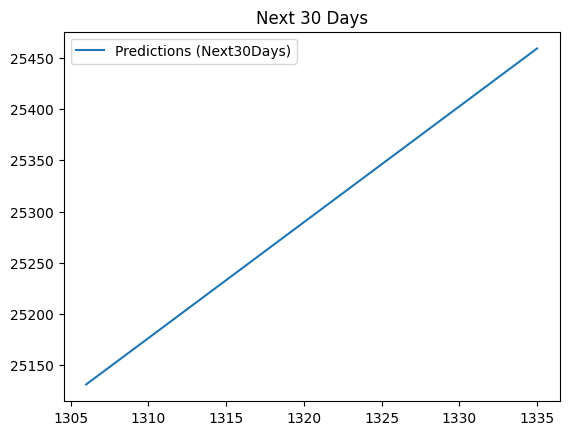

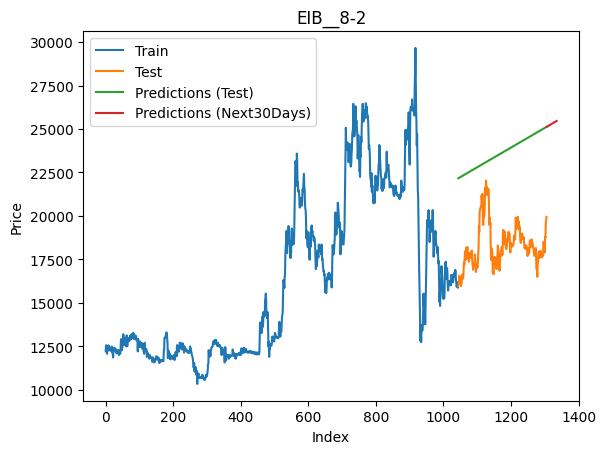

In [15]:
# use plots to display data
# next 30 days
plt.title("Next 30 Days")
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Predictions (Next30Days)'])
plt.show()
# all
makePlots((test_ratio, x_train , y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days))